In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('new_train.csv')
df = pd.DataFrame(train_data)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [4]:
# بشوف ايه الاعمده اللي عنده القيم بتاعتها ب null

nan_cols = [i for i in df.columns if df[i].isnull().any()]
df[nan_cols].isnull().sum()


Series([], dtype: float64)

In [5]:
# بقسم الداتا لارقام و نصوص

dftNumeric = df.select_dtypes(include=['int64', 'float64'])
dftObject = df.select_dtypes(include=['object'])

In [6]:
dftNumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       32950 non-null  int64
 1   duration  32950 non-null  int64
 2   campaign  32950 non-null  int64
 3   pdays     32950 non-null  int64
 4   previous  32950 non-null  int64
dtypes: int64(5)
memory usage: 1.3 MB


In [7]:
dftObject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          32950 non-null  object
 1   marital      32950 non-null  object
 2   education    32950 non-null  object
 3   default      32950 non-null  object
 4   housing      32950 non-null  object
 5   loan         32950 non-null  object
 6   contact      32950 non-null  object
 7   month        32950 non-null  object
 8   day_of_week  32950 non-null  object
 9   poutcome     32950 non-null  object
 10  y            32950 non-null  object
dtypes: object(11)
memory usage: 2.8+ MB


In [8]:
# تحويل القيم النصيه الي قيم عدديه 


dftObjcat = dftObject.columns
for i in dftObjcat:
    print(f'Catagory of {i}')
    catlist = dftObject[i].unique()
    for j, val in enumerate(catlist):
         # هنا بدي لكل صفه جوه فئه معينه قيمه عدديه
         dftobjfinal = dftObject[i].replace({val:j+1},inplace=True)
         #print(dftobjfinal)
         print(j,val)
         
    print('--------------------------------')

Catagory of job
0 blue-collar
1 entrepreneur
2 retired
3 admin.
4 student
5 services
6 technician
7 self-employed
8 management
9 unemployed
10 unknown
11 housemaid
--------------------------------
Catagory of marital
0 married
1 divorced
2 single
3 unknown
--------------------------------
Catagory of education
0 basic.9y
1 university.degree
2 basic.4y
3 high.school
4 professional.course
5 unknown
6 basic.6y
7 illiterate
--------------------------------
Catagory of default
0 unknown
1 no
2 yes
--------------------------------
Catagory of housing
0 no
1 yes
2 unknown
--------------------------------
Catagory of loan
0 no
1 yes
2 unknown
--------------------------------
Catagory of contact
0 cellular
1 telephone
--------------------------------
Catagory of month
0 nov
1 jul
2 may
3 jun
4 aug
5 mar
6 oct
7 apr
8 sep
9 dec
--------------------------------
Catagory of day_of_week
0 wed
1 mon
2 tue
3 fri
4 thu
--------------------------------
Catagory of poutcome
0 nonexistent
1 failure
2 suc

In [9]:
dftObject



,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1,1,1,1,1,1,1,1,1,1,1
1,2,1,2,2,1,1,2,1,1,2,1
2,3,1,3,2,1,1,1,2,2,1,2
3,4,1,2,2,2,1,2,3,2,1,1
4,3,2,2,2,1,1,1,4,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
32945,6,3,4,2,2,1,1,2,3,1,1
32946,7,1,5,2,2,1,1,1,4,2,1
32947,4,1,1,2,1,2,1,2,2,1,1
32948,4,1,2,2,1,1,2,3,4,1,1


In [10]:
# بدمج الداتا العدديه الاساسيه مع الداتا العدديه المحوله 


df_Final = pd.concat([dftObject, dftNumeric], axis=1)
df_Final

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,duration,campaign,pdays,previous
0,1,1,1,1,1,1,1,1,1,1,1,49,227,4,999,0
1,2,1,2,2,1,1,2,1,1,2,1,37,202,2,999,1
2,3,1,3,2,1,1,1,2,2,1,2,78,1148,1,999,0
3,4,1,2,2,2,1,2,3,2,1,1,36,120,2,999,0
4,3,2,2,2,1,1,1,4,3,1,1,59,368,2,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,6,3,4,2,2,1,1,2,3,1,1,28,192,1,999,0
32946,7,1,5,2,2,1,1,1,4,2,1,52,64,1,999,1
32947,4,1,1,2,1,2,1,2,2,1,1,54,131,4,999,0
32948,4,1,2,2,1,1,2,3,4,1,1,29,165,1,999,0


In [11]:
# عاوز اشيل النقاط الشاذه فالداتا ال outliers


from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()

# بجيب كل النقاط الشاذه عندي وبحفظها 1 للقيم الطبيعيه و -1 للشاذه

y_pred = clf.fit_predict(df_Final)

In [12]:
# 


x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5

# دي فيها كل القيم اللي من ال -1.5 
filtre2 = outlier_score["score"] < threshold2

# دي كده عندي قيم الصفوف اللي فيها النقاط الشاذه عندي  

outlier_index = outlier_score[filtre2].index.tolist()

In [13]:
len(outlier_index)

274

In [14]:
# هنا بسقط القيم اللي الانديكس بتاعها بيدل علي انها نقاط شاذه


df_Final.drop(outlier_index, inplace=True)

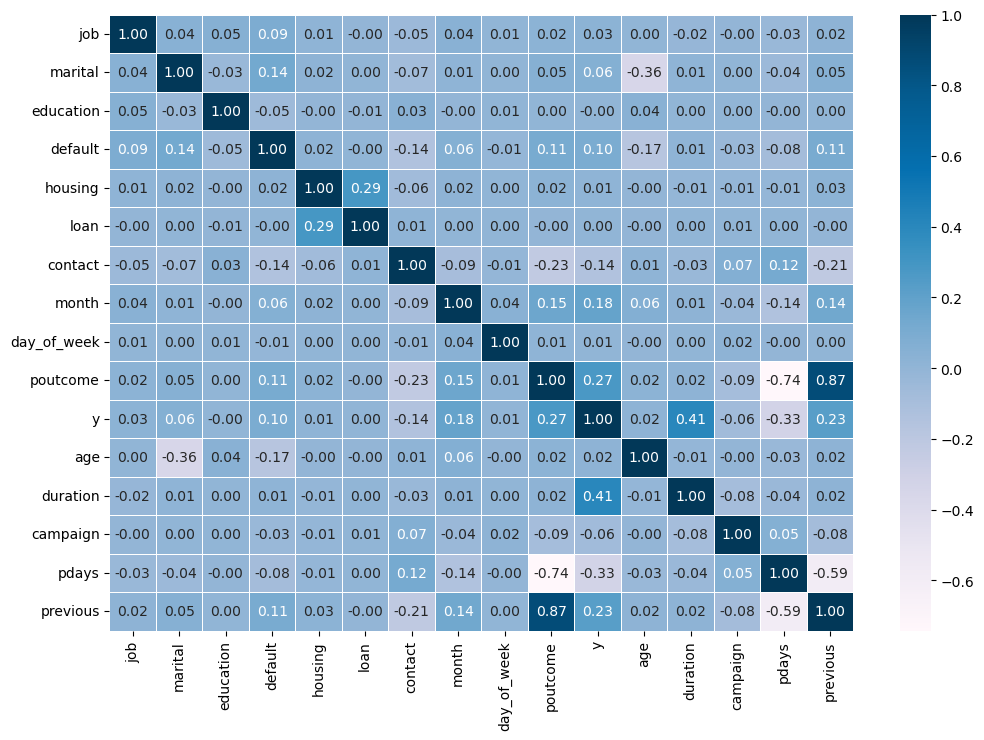

In [15]:
# بعمل heatmap عشان اوضح العلاقه بين الداتا وبعضها 


import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_Final.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()


In [16]:
# برتبهم تصاعدي حسب معامل الارتباط 


corr = df_Final.corr()
corr["previous"].sort_values()

pdays         -0.588572
contact       -0.213642
campaign      -0.078059
loan          -0.000593
education      0.000768
day_of_week    0.004415
duration       0.018594
age            0.018826
job            0.019672
housing        0.025926
marital        0.053607
default        0.106387
month          0.142036
y              0.231030
poutcome       0.867121
previous       1.000000
Name: previous, dtype: float64

In [17]:
# علشان ماشيت عكس الداتا  'campaign','duration' بمسح ال  

dfmodel = df_Final.drop(['campaign','duration'], axis = 1)
dfmodel


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,pdays,previous
0,1,1,1,1,1,1,1,1,1,1,1,49,999,0
1,2,1,2,2,1,1,2,1,1,2,1,37,999,1
3,4,1,2,2,2,1,2,3,2,1,1,36,999,0
4,3,2,2,2,1,1,1,4,3,1,1,59,999,0
5,4,3,2,2,1,1,1,5,1,1,1,29,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,6,3,4,2,2,1,1,2,3,1,1,28,999,0
32946,7,1,5,2,2,1,1,1,4,2,1,52,999,1
32947,4,1,1,2,1,2,1,2,2,1,1,54,999,0
32948,4,1,2,2,1,1,2,3,4,1,1,29,999,0


In [18]:
x = dfmodel.drop(['y'], axis=1)
x

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,pdays,previous
0,1,1,1,1,1,1,1,1,1,1,49,999,0
1,2,1,2,2,1,1,2,1,1,2,37,999,1
3,4,1,2,2,2,1,2,3,2,1,36,999,0
4,3,2,2,2,1,1,1,4,3,1,59,999,0
5,4,3,2,2,1,1,1,5,1,1,29,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,6,3,4,2,2,1,1,2,3,1,28,999,0
32946,7,1,5,2,2,1,1,1,4,2,52,999,1
32947,4,1,1,2,1,2,1,2,2,1,54,999,0
32948,4,1,2,2,1,1,2,3,4,1,29,999,0


In [19]:
# بسقط الاوتبوت

y = dfmodel['y']
y.value_counts()

1    29028
2     3648
Name: y, dtype: int64

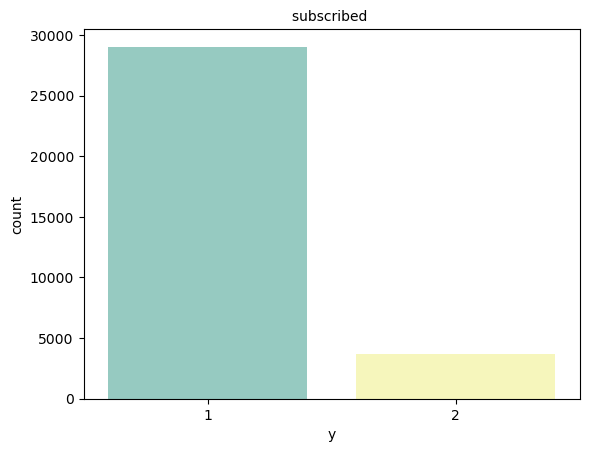

In [20]:
sns.countplot(x=y, palette='Set3')
plt.title("subscribed ",fontsize=10)
plt.show()

In [21]:
# بعمل encoder for y


from sklearn.preprocessing import LabelEncoder

#Create  LabelEncoder object
le = LabelEncoder()

#Fit and transform y
y = le.fit_transform(y)


In [22]:
# StandardScaler

from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]


array([[-1.2971916 , -0.76367625, -1.33204866, -1.93652007, -1.05726088,
        -0.43997707, -0.75732005, -1.36146702, -1.41006686, -0.37404513,
         0.88419002,  0.19525294, -0.34972263],
       [-0.9572332 , -0.76367625, -0.74027655,  0.51581996, -1.05726088,
        -0.43997707,  1.32044569, -1.36146702, -1.41006686,  1.82065745,
        -0.28568792,  0.19525294,  1.65863179],
       [-0.27731641, -0.76367625, -0.74027655,  0.51581996,  0.78997773,
        -0.43997707,  1.32044569, -0.31111118, -0.70675533, -0.37404513,
        -0.38317775,  0.19525294, -0.34972263],
       [-0.61727481,  0.35981594, -0.74027655,  0.51581996, -1.05726088,
        -0.43997707, -0.75732005,  0.21406674, -0.00344381, -0.37404513,
         1.8590883 ,  0.19525294, -0.34972263],
       [-0.27731641,  1.48330813, -0.74027655,  0.51581996, -1.05726088,
        -0.43997707, -0.75732005,  0.73924466, -1.41006686, -0.37404513,
        -1.06560654,  0.19525294, -0.34972263]])

In [23]:
# نقسم الداتا بقي 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_test.shape,  y_test.shape)

Train set: (26140, 13) (26140,)
Validation set: (6536, 13) (6536,)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier



from PIL import Image
warnings.filterwarnings('ignore')

In [25]:
classifiers = [
    LogisticRegression(solver='liblinear'),
    RandomForestClassifier(),
    KNeighborsClassifier(),           
    SVC(),
    MLPClassifier(),
    GaussianNB(),
    XGBClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier()
    
    
    ]

______________________________________________
LogisticRegression(solver='liblinear')
..............................................
Train 89.63657230298394
Test 90.77417380660955


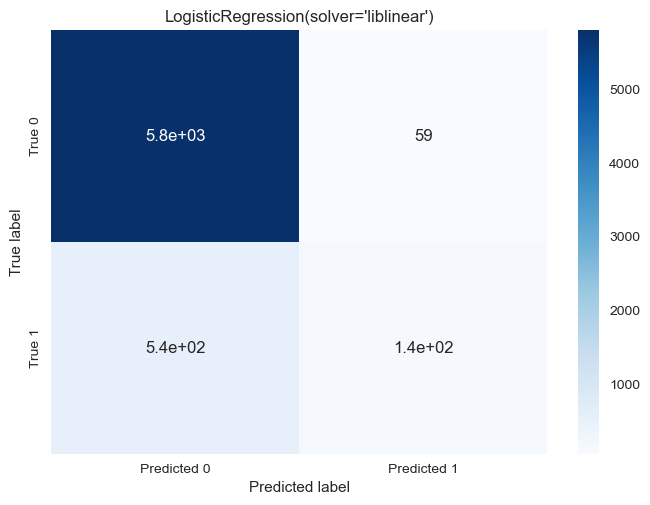

______________________________________________
RandomForestClassifier()
..............................................
Train 98.61514919663351
Test 89.3359853121175


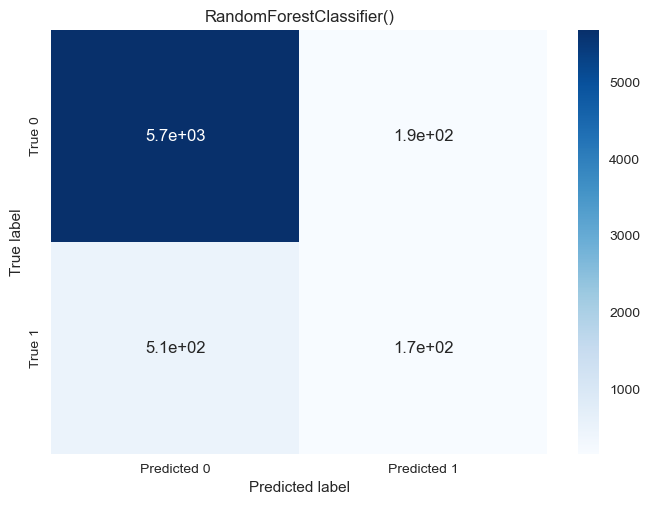

______________________________________________
KNeighborsClassifier()
..............................................
Train 90.65799540933436
Test 89.7796817625459


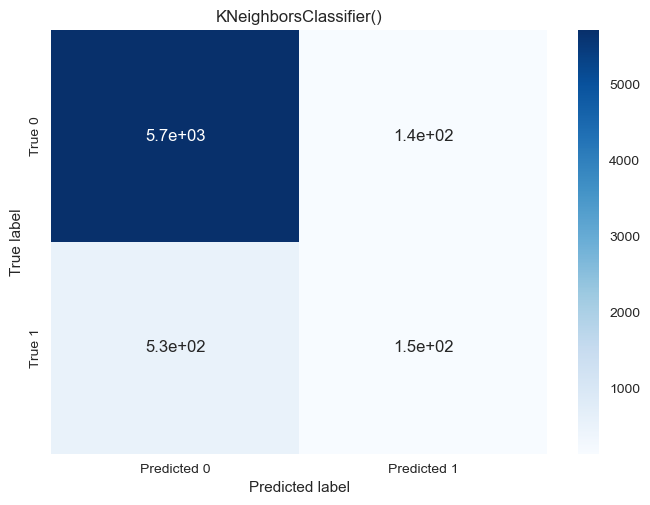

______________________________________________
SVC()
..............................................
Train 89.89671002295333
Test 90.74357405140759


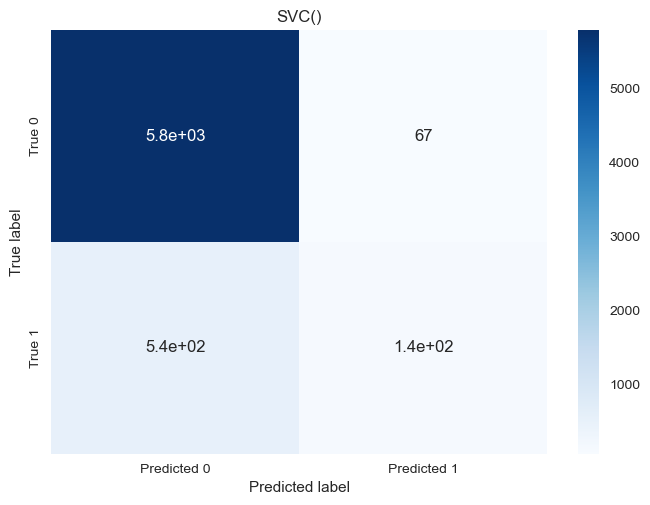

______________________________________________
MLPClassifier()
..............................................
Train 89.94644223412395
Test 90.10097919216646


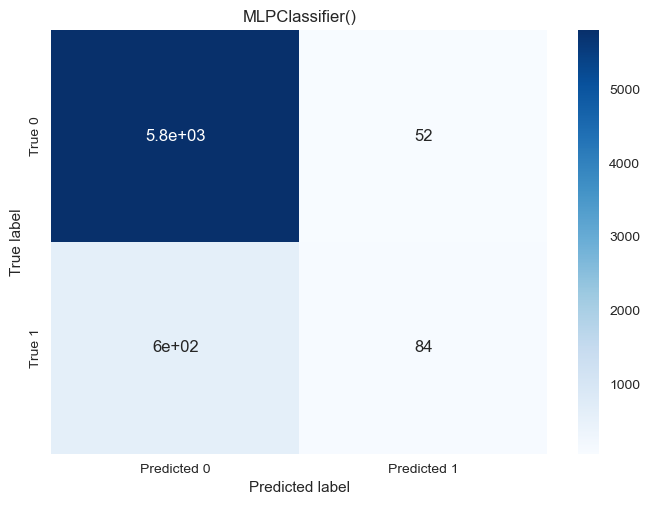

______________________________________________
GaussianNB()
..............................................
Train 85.65416985462892
Test 86.67380660954713


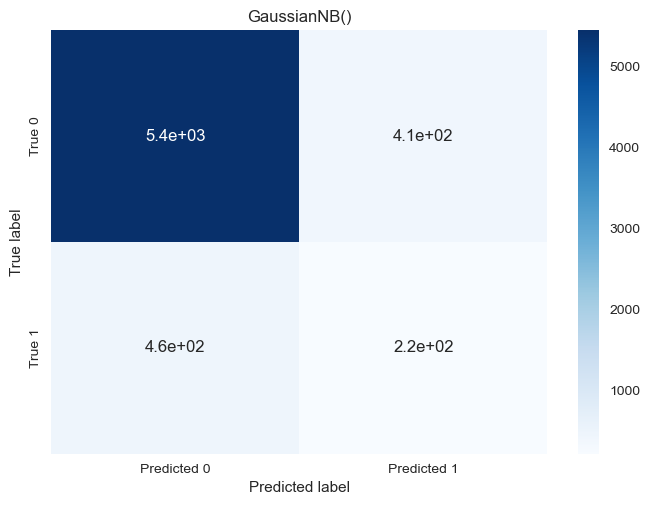

______________________________________________
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
..............................................
Train 92.31446059678653
Test 90.40697674418605


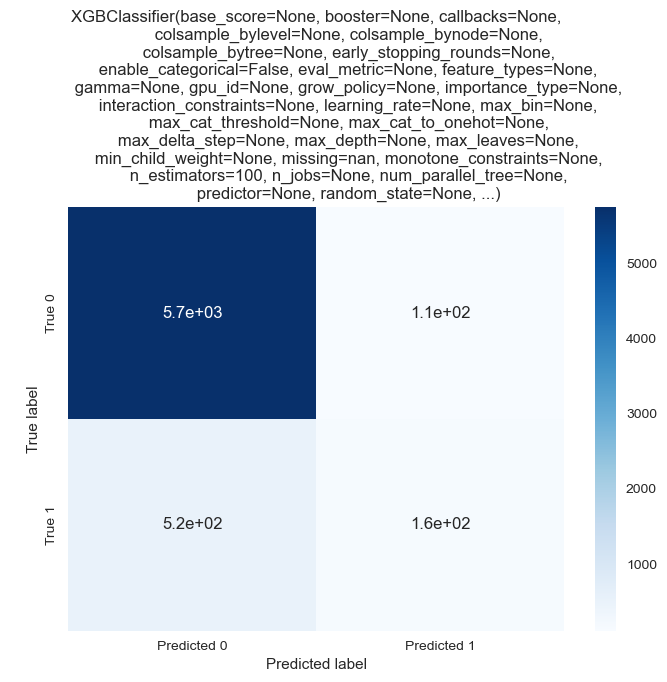

______________________________________________
DecisionTreeClassifier()
..............................................
Train 98.61514919663351
Test 84.33292533659731


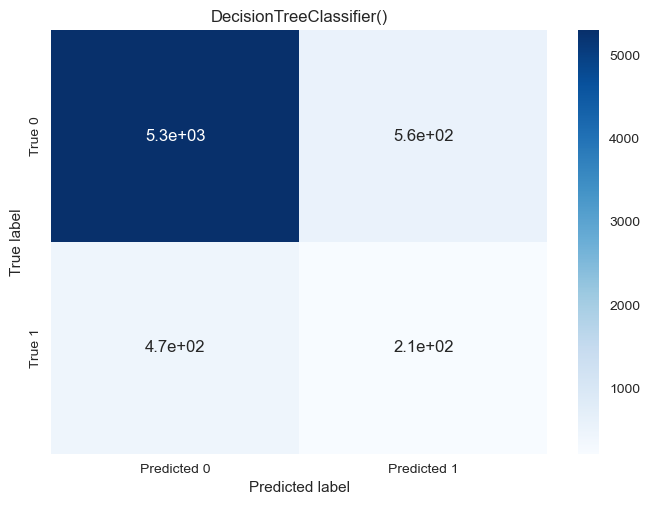

______________________________________________
GradientBoostingClassifier()
..............................................
Train 90.07268553940322
Test 90.62117503059976


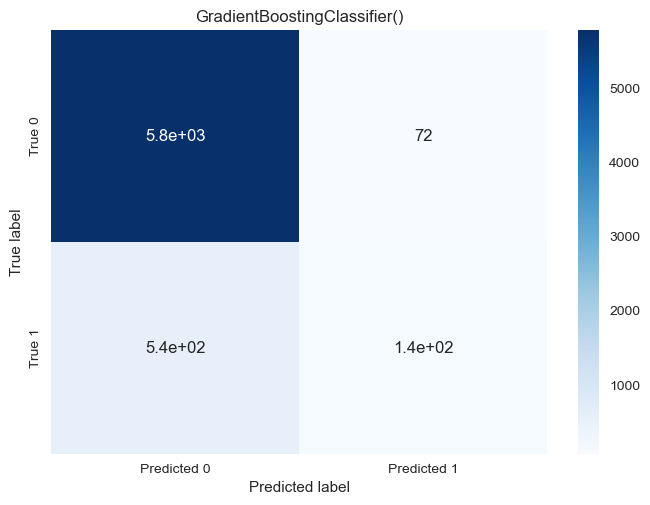

In [35]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc=[]
percisionlst=[]
recall=[]

f1_score1=[]
for i in classifiers:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('______________________________________________')
    print(i)
    print('..............................................')
    print('Train',model.score(X_train, y_train)*100)
    print('Test',model.score(X_test, y_test)*100)
    conf=confusion_matrix(y_test,y_pred)
    perc=precision_score(y_test,y_pred)
    percisionlst.append(perc)
    acc1=accuracy_score(y_test,y_pred)
    acc.append(acc1)
    re=recall_score(y_test,y_pred)
    recall.append(re)
    sns.heatmap(conf, annot=True, cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['True 0', 'True 1'])
    plt.title(i)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [43]:
print(percisionlst)
print(acc)
print(recall)
acclst=acc
recalllst=recall

[0.6958762886597938, 0.4745762711864407, 0.519298245614035, 0.6778846153846154, 0.6176470588235294, 0.3490566037735849, 0.5942028985507246, 0.2756827048114434, 0.6571428571428571]
[0.9077417380660955, 0.893359853121175, 0.897796817625459, 0.9074357405140759, 0.9010097919216646, 0.8667380660954712, 0.9040697674418605, 0.8433292533659731, 0.9062117503059975]
[0.19882179675994108, 0.24742268041237114, 0.21796759941089838, 0.20765832106038293, 0.12371134020618557, 0.3269513991163476, 0.24153166421207659, 0.3122238586156112, 0.203240058910162]


In [28]:
model=  GradientBoostingClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
prec=precision_score(y_test,pred)
print(prec)


0.6571428571428571


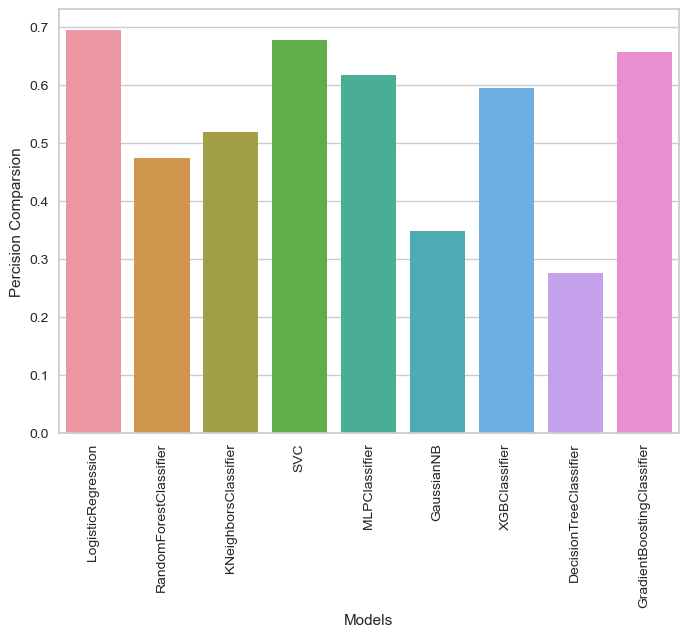

In [41]:
 
precision={'models':['LogisticRegression','RandomForestClassifier','KNeighborsClassifier','SVC','MLPClassifier','GaussianNB','XGBClassifier','DecisionTreeClassifier','GradientBoostingClassifier'],
           'pr':[percisionlst[0],percisionlst[1],percisionlst[2],percisionlst[3],percisionlst[4],percisionlst[5],percisionlst[6],percisionlst[7],percisionlst[8]]}
sns.barplot(data=precision,x='models',y='pr')
plt.xlabel('Models')
plt.ylabel('Percision Comparsion')
plt.xticks(rotation=90)

plt.show()



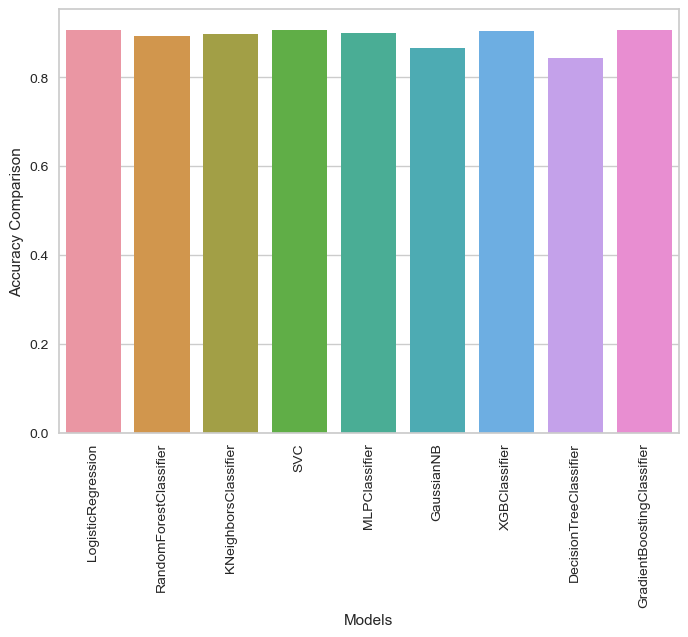

In [40]:
acc2 = {'models': ['LogisticRegression','RandomForestClassifier','KNeighborsClassifier','SVC','MLPClassifier','GaussianNB','XGBClassifier','DecisionTreeClassifier','GradientBoostingClassifier'],
       'accuracy': [acclst[0], acclst[1], acclst[2], acclst[3], acclst[4], acclst[5], acclst[6], acclst[7], acclst[8]]}
sns.barplot(data=acc2, x='models', y='accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Comparison')
plt.xticks(rotation=90)

plt.show()


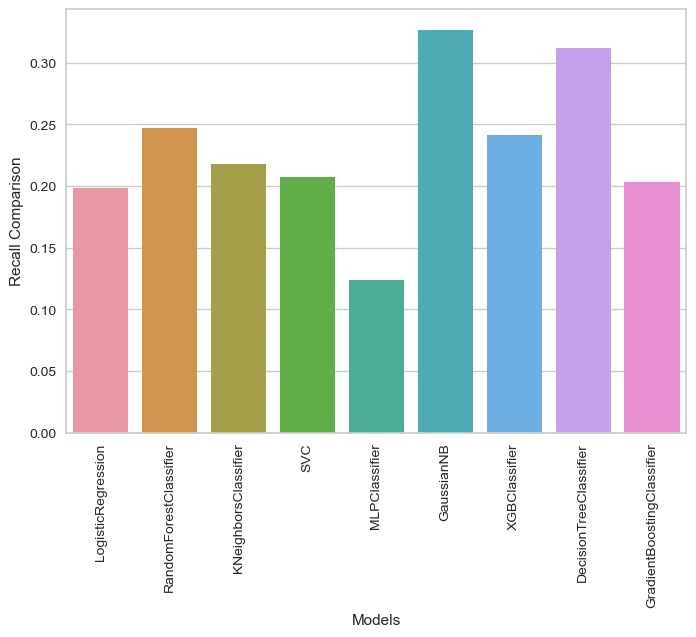

In [44]:
recall1 = {'models': ['LogisticRegression','RandomForestClassifier','KNeighborsClassifier','SVC','MLPClassifier','GaussianNB','XGBClassifier','DecisionTreeClassifier','GradientBoostingClassifier'],
       'recall': [recalllst[0], recalllst[1], recalllst[2], recalllst[3], recalllst[4], recalllst[5], recalllst[6], recalllst[7], recalllst[8]]}
sns.barplot(data=recall1, x='models', y='recall')
plt.xlabel('Models')
plt.ylabel('Recall Comparison')
plt.xticks(rotation=90)

plt.show()


In [29]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train,y_train)
predicted = r_forest.predict(X_test)
score = r_forest.score(X_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.895


In [30]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5857
           1       0.49      0.25      0.33       679

    accuracy                           0.90      6536
   macro avg       0.70      0.61      0.64      6536
weighted avg       0.87      0.90      0.88      6536



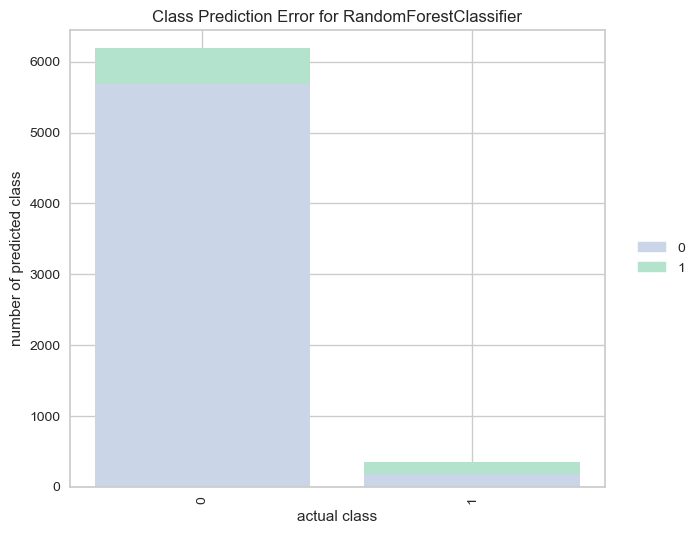

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [31]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style import set_palette

visualizer = ClassPredictionError(r_forest)

set_palette('pastel')

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)
visualizer.show() 

In [45]:
datatest = pd.read_csv('new_test.csv')
df_test = pd.DataFrame(datatest)
df_test.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   default      8238 non-null   int64
 5   housing      8238 non-null   int64
 6   loan         8238 non-null   int64
 7   contact      8238 non-null   int64
 8   month        8238 non-null   int64
 9   day_of_week  8238 non-null   int64
 10  duration     8238 non-null   int64
 11  campaign     8238 non-null   int64
 12  poutcome     8238 non-null   int64
dtypes: int64(13)
memory usage: 836.8 KB


In [47]:
predicted_test = r_forest.predict(df_test[1:10])
predicted_test


array([1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)